In [1]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 0

In [11]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)  # this is needed since the combined df has ~400 cols

print "Import successful"

Import successful


In [9]:
try:
    data = pd.io.parsers.read_csv('./Data/train_lonlat_id_CS_0521_feature.csv')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 323 features each.


In [12]:
print "Display sample of training data:"
display(data.head())

Display sample of training data:


0_13_all  0_13_female  0_13_male  0_17_all  0_17_female  0_17_male  \
0     18654         8945       9709     23603        11317      12286   
1     13729         6800       6929     17700         8702       8998   
2     11252         5336       5916     14884         7063       7821   
3     24934        12152      12782     32063        15550      16513   
4     11631         5408       6223     15237         7124       8113   

   0_6_all  0_6_female  0_6_male  16_29_all  16_29_female  16_29_male  \
0     9576        4677      4899      17508          8083        9425   
1     6880        3414      3466      15164          7593        7571   
2     5879        2784      3095      19401         10356        9045   
3    13087        6442      6645       3292          1842        1450   
4     5706        2724      2982       5164          2581        2583   

   7_14_all  7_14_female  7_14_male  ID_big_road1  ID_big_road2  \
0     10309         4846       5463             1             5   
1      7759         3850       3909             2             4   
2      6207         2938       3269             3             4   
3     13670         6544       7126             1            17   
4      6748         3084       3664             4            10   

   ID_bus_terminal  ID_metro  ID_railroad_station_avto  \
0                1         1                         1   
1                2         2                         2   
2                3         3                         3   
3                1         4                         4   
4                4         5                       113   

   ID_railroad_station_walk  ID_railroad_terminal         OKRUGS  \
0                       1.0                   101  North-Eastern   
1                       2.0                    32       Southern   
2                       3.0                     5  South-Eastern   
3                       4.0                    83  North-Western   
4                       5.0                   113        Central   

   additional_education_km  additional_education_raion        area_m  \
0                 0.947962                           3  6.407578e+06   
1                 1.072315                           1  9.589337e+06   
2                 0.391957                           1  4.808270e+06   
3                 0.892674                           6  1.258354e+07   
4                 0.810801                           2  8.398461e+06   

   basketball_km  big_church_count_1000  big_church_count_1500  \
0       3.516513                      1                      1   
1       1.161579                      1                      1   
2       1.952771                      0                      0   
3       4.923843                      0                      1   
4       0.307915                      7                     18   

   big_church_count_2000  big_church_count_3000  big_church_count_500  \
0                      1                      2                     0   
1                      1                      1                     0   
2                      0                      0                     0   
3                      1                      1                     0   
4                     35                     70                     1   

   big_church_count_5000  big_church_km  big_market_km big_market_raion  \
0                     13       0.625783      10.814172               no   
1                     15       0.967821       6.910568               no   
2                     11       3.178751       5.752368               no   
3                      4       1.031777      27.892717               no   
4                    135       0.378756       9.155057               no   

  big_road1_1line  big_road1_km  big_road2_km  build_count_1921-1945  \
0              no      1.422391      3.830951                    0.0   
1              no      2.887377      3.103996                    1.0   
2              no      0.647

In [13]:
print "Display statistics about training data:"
display(data.describe())


Display statistics about training data:


0_13_all   0_13_female     0_13_male      0_17_all   0_17_female  \
count  30471.000000  30471.000000  30471.000000  30471.000000  30471.000000   
mean    9841.097535   4803.833153   5037.272489  12540.611303   6117.569525   
std     7290.007118   3536.907486   3760.750648   9253.046693   4491.734947   
min      322.000000    156.000000    166.000000    411.000000    198.000000   
25%     3112.000000   1512.000000   1600.000000   3831.000000   1858.000000   
50%     9633.000000   4667.000000   4835.000000  12508.000000   6185.000000   
75%    13121.000000   6699.000000   6684.000000  16727.000000   8549.000000   
max    36035.000000  17461.000000  18574.000000  45170.000000  21937.000000   

          0_17_male       0_6_all    0_6_female      0_6_male      16_29_all  \
count  30471.000000  30471.000000  30471.000000  30471.000000   30471.000000   
mean    6423.198517   5140.026156   2508.955696   2631.199173   31316.289849   
std     4769.593328   3816.625140   1846.598072   1973.220681   60381.518679   
min      214.000000    175.000000     85.000000     91.000000     575.000000   
25%     1973.000000   1706.000000    844.000000    862.000000    5829.000000   
50%     6085.000000   4857.000000   2390.000000   2435.000000   17864.000000   
75%     8599.000000   7103.000000   3455.000000   3523.000000   27194.000000   
max    23233.000000  19223.000000   9236.000000   9987.000000  367659.000000   

        16_29_female     16_29_male      7_14_all   7_14_female     7_14_male  \
count   30471.000000   30471.000000  30471.000000  30471.000000  30471.000000   
mean    15946.978767   15369.431066   5354.269699   2610.946507   2743.470349   
std     31108.976825   29298.648419   3989.640917   1941.380464   2054.521520   
min       253.000000     308.000000    168.000000     82.000000     87.000000   
25%      2874.000000    2955.000000   1564.000000    743.000000    821.000000   
50%      9353.000000    8896.000000   5261.000000   2535.000000   2693.000000   
75%     14184.000000   13683.000000   7227.000000   3534.000000   3585.000000   
max    194701.000000  172958.000000  19083.000000   9322.000000   9761.000000   

       ID_big_road1  ID_big_road2  ID_bus_terminal      ID_metro  \
count  30471.000000  30471.000000     30471.000000  30471.000000   
mean      11.515014     22.414066         6.695514     72.484198   
std       11.348724     17.389323         3.790844     54.902277   
min        1.000000      1.000000         1.000000      1.000000   
25%        2.000000      4.000000         3.000000     27.000000   
50%       10.000000     21.000000         8.000000     53.000000   
75%       14.000000     38.000000         9.000000    108.000000   
max       48.000000     58.000000        14.000000    223.000000   

       ID_railroad_station_avto  ID_railroad_station_walk  \
count              30471.000000              30446.000000   
mean                  45.707853                 38.857321   
std                   34.393019                 27.766264   
min                    1.000000                  1.000000   
25%                   19.000000                 18.000000   
50%                   34.000000                 33.000000   
75%                   73.000000                 53.000000   
max                  138.000000                133.000000   

       ID_railroad_terminal  additional_education_km  \
count          30471.000000             30471.000000   
mean              51.670966                 1.328488   
std               35.336898                 1.526219   
min                5.000000                 0.000000   
25%               32.000000                 0.474842   
50%               50.000000                 0.899034   
75%               83.000000                 1.571062   
max              121.000000                24.268209   

       additional_education_raion        area_m  basketball_km  \
count                30471.000000  3.047100e+04   30471.000000   
mean                     2.896393  1.765705e+07 

In [20]:
nan_counts = data.isnull().sum()
nan_counts
# data.count()

0_13_all                          0
0_13_female                       0
0_13_male                         0
0_17_all                          0
0_17_female                       0
0_17_male                         0
0_6_all                           0
0_6_female                        0
0_6_male                          0
16_29_all                         0
16_29_female                      0
16_29_male                        0
7_14_all                          0
7_14_female                       0
7_14_male                         0
ID_big_road1                      0
ID_big_road2                      0
ID_bus_terminal                   0
ID_metro                          0
ID_railroad_station_avto          0
ID_railroad_station_walk         25
ID_railroad_terminal              0
OKRUGS                            0
additional_education_km           0
additional_education_raion        0
area_m                            0
basketball_km                     0
big_church_count_1000       

ID_railroad_station_walk    0.000820
build_count_1921-1945       0.163795
build_count_1946-1970       0.163795
build_count_1971-1995       0.163795
build_count_after_1995      0.163795
dtype: float64

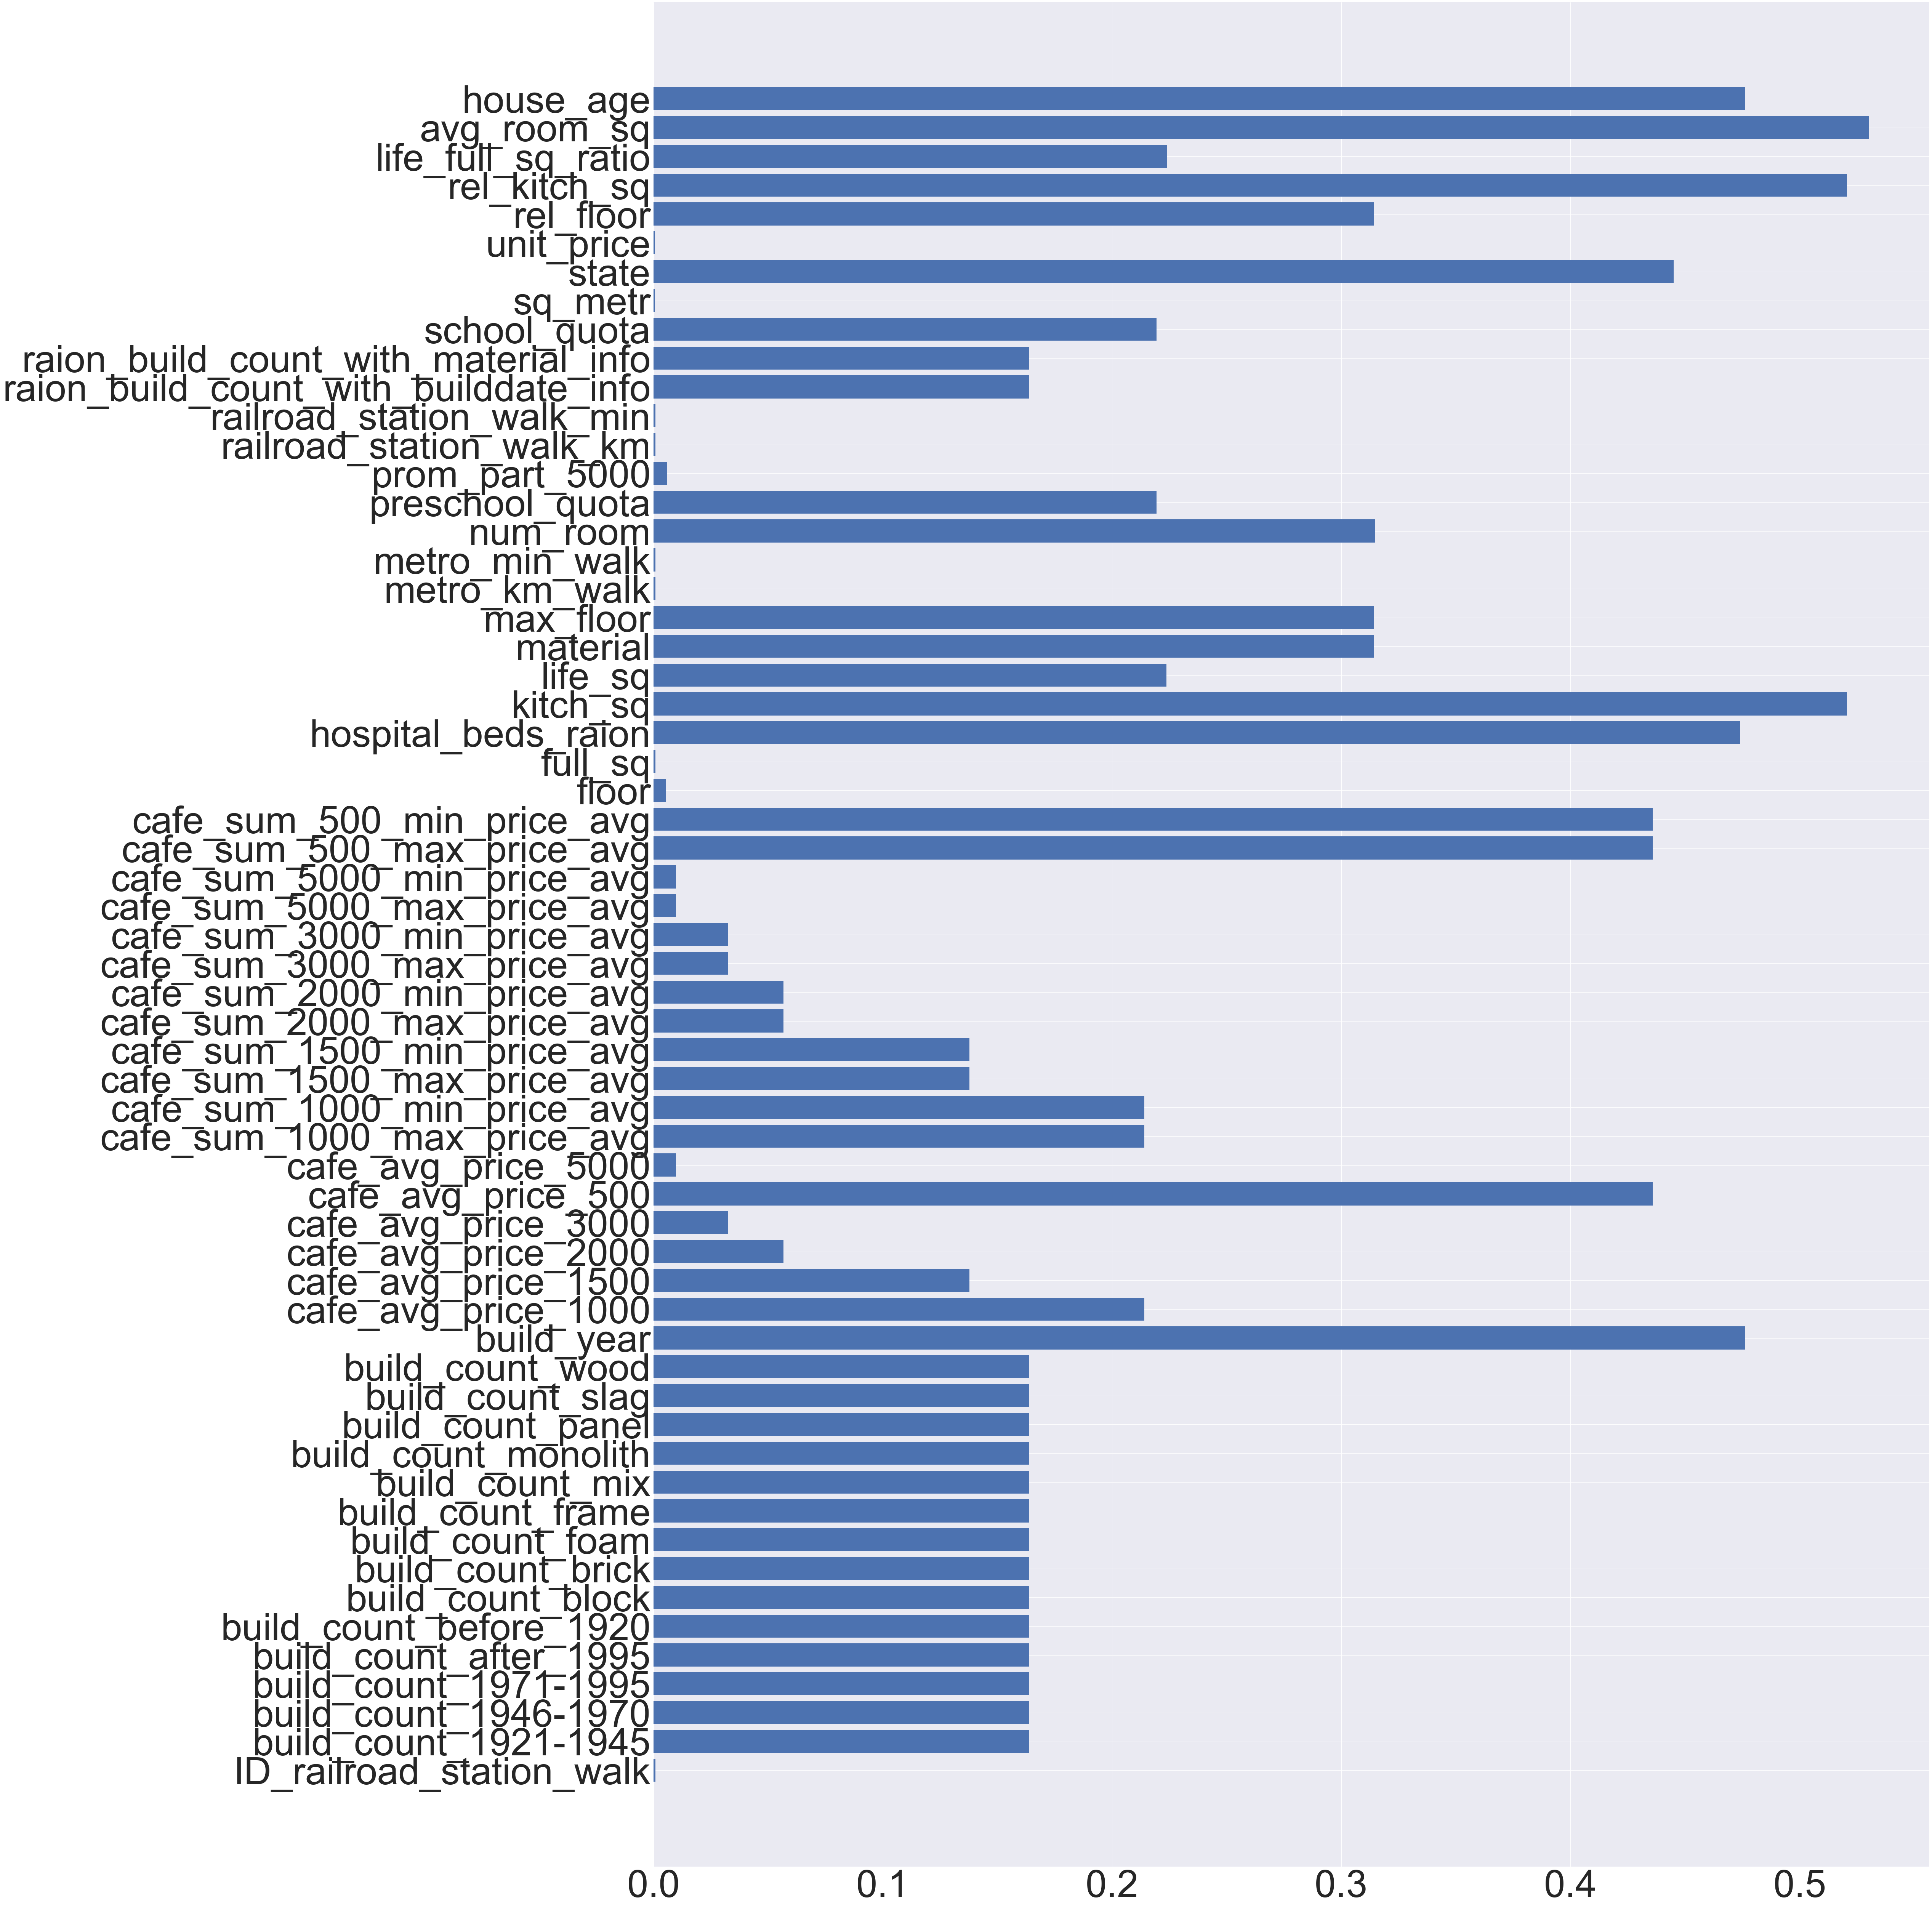

In [22]:
#Ref: http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

nan_counts = data.isnull().sum()
nan_ratios = nan_counts / data.shape[0]
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [23]:
#remove unwanted columns and subset the 40 final features

train_data_features = data[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','radiation_km','school_km','material','metro_min_avto','railroad_km'
,'industrial_km','green_zone_km','theater_km','swim_pool_km','big_church_km','water_km','railroad_station_walk_km','hospice_morgue_km'
,'mosque_km','cemetery_km','fitness_km','nuclear_reactor_km','church_synagogue_km','park_km','green_part_500',
'hospital_beds_raion',
'market_shop_km',
'thermal_power_plant_km',
'sadovoe_km',
'ice_rink_km',
'water_treatment_km',
'office_sqm_500',
'green_part_1500',
'preschool_quota','price_doc']]
print "Russian housing train_data_features dataset has {} samples with {} features each.".format(*train_data_features.shape)

Russian housing train_data_features dataset has 30471 samples with 41 features each.


In [24]:
print "Display statistics about training data:"
display(train_data_features.describe())

Display statistics about training data:


full_sq       life_sq         floor    build_year     max_floor  \
count  30445.000000  23653.000000  30304.000000  15964.000000  20896.000000   
mean      53.909893     34.500760      7.668493   1985.368391     12.541778   
std       21.158891     18.301003      5.305061     20.866523      6.638022   
min        5.000000      7.000000      0.000000   1860.000000      0.000000   
25%       38.000000     20.000000      3.000000   1968.000000      9.000000   
50%       49.000000     30.000000      6.500000   1981.000000     12.000000   
75%       63.000000     43.000000     11.000000   2006.000000     17.000000   
max      303.000000    232.000000     44.000000   2018.000000     57.000000   

       month_year_cnt  week_year_cnt      kitch_sq      num_room  \
count    30471.000000   30471.000000  14608.000000  20881.000000   
mean       860.920121     210.401365      8.053751      1.908769   
std        376.290762     110.998142      3.230431      0.832218   
min          3.000000       1.000000      2.000000      1.000000   
25%        545.000000     126.000000      6.000000      1.000000   
50%        839.000000     194.000000      8.000000      2.000000   
75%       1143.000000     269.000000     10.000000      2.000000   
max       1705.000000     627.000000     97.000000      9.000000   

              state  kindergarten_km  radiation_km     school_km  \
count  16912.000000     30471.000000  30471.000000  30471.000000   
mean       2.105251         0.981684      4.410781      1.323956   
std        0.847508         2.121956      5.595367      3.058145   
min        1.000000         0.000470      0.004663      0.000000   
25%        1.000000         0.199946      1.231846      0.269716   
50%        2.000000         0.353762      2.435160      0.474862   
75%        3.000000         0.971417      4.687054      0.886531   
max        4.000000        29.085774     53.890157     47.394706   

           material  metro_min_avto   railroad_km  industrial_km  \
count  20898.000000    30471.000000  30471.000000   30471.000000   
mean       1.827065        4.961273      1.889380       0.768831   
std        1.481167        6.553515      1.972818       0.717953   
min        1.000000        0.000000      0.002299       0.000000   
25%        1.000000        1.721280      0.655010       0.288289   
50%        1.000000        2.803299      1.238357       0.576464   
75%        2.000000        4.831733      2.520431       1.041085   
max        6.000000       61.438472     17.387119      14.048162   

       green_zone_km    theater_km  swim_pool_km  big_church_km      water_km  \
count   30471.000000  30471.000000  30471.000000   30471.000000  30471.000000   
mean        0.300511      9.638074      4.232376       2.330047      0.690947   
std         0.298402      7.112284      4.626039       2.986937      0.434919   
min         0.000000      0.026788      0.000000       0.004072      0.006707   
25%         0.100951      4.225254      1.709065       0.860469      0.339637   
50%         0.214336      8.612007      2.876573       1.490794      0.621221   
75%         0.415498     13.459593      5.369801       2.922264      0.963865   
max         1.982448     87.600690     53.359294      45.669060      2.827709   

       railroad_station_walk_km  hospice_morgue_km     mosque_km  \
count              30446.000000       30471.000000  30471.000000   
mean                   4.386945           2.646493      7.739237   
std                    3.836359           2.952410      5.780424   
min                    0.028153           0.002517      0.005545   
25%                    1.931375           1.118164      3.766071   
50%                    3.235540           1.895682      6.543563   
75%                    5.147642           3.297318     10.047046   
max                   24.653041          43.694640     44.849832   

        cemetery_km    fitness_km  nuclear_reactor_km  church_synagogue_km  \
count  30471.000000  30471.000000       

full_sq       0.000853
life_sq       0.223754
floor         0.005481
build_year    0.476092
max_floor     0.314233
dtype: float64

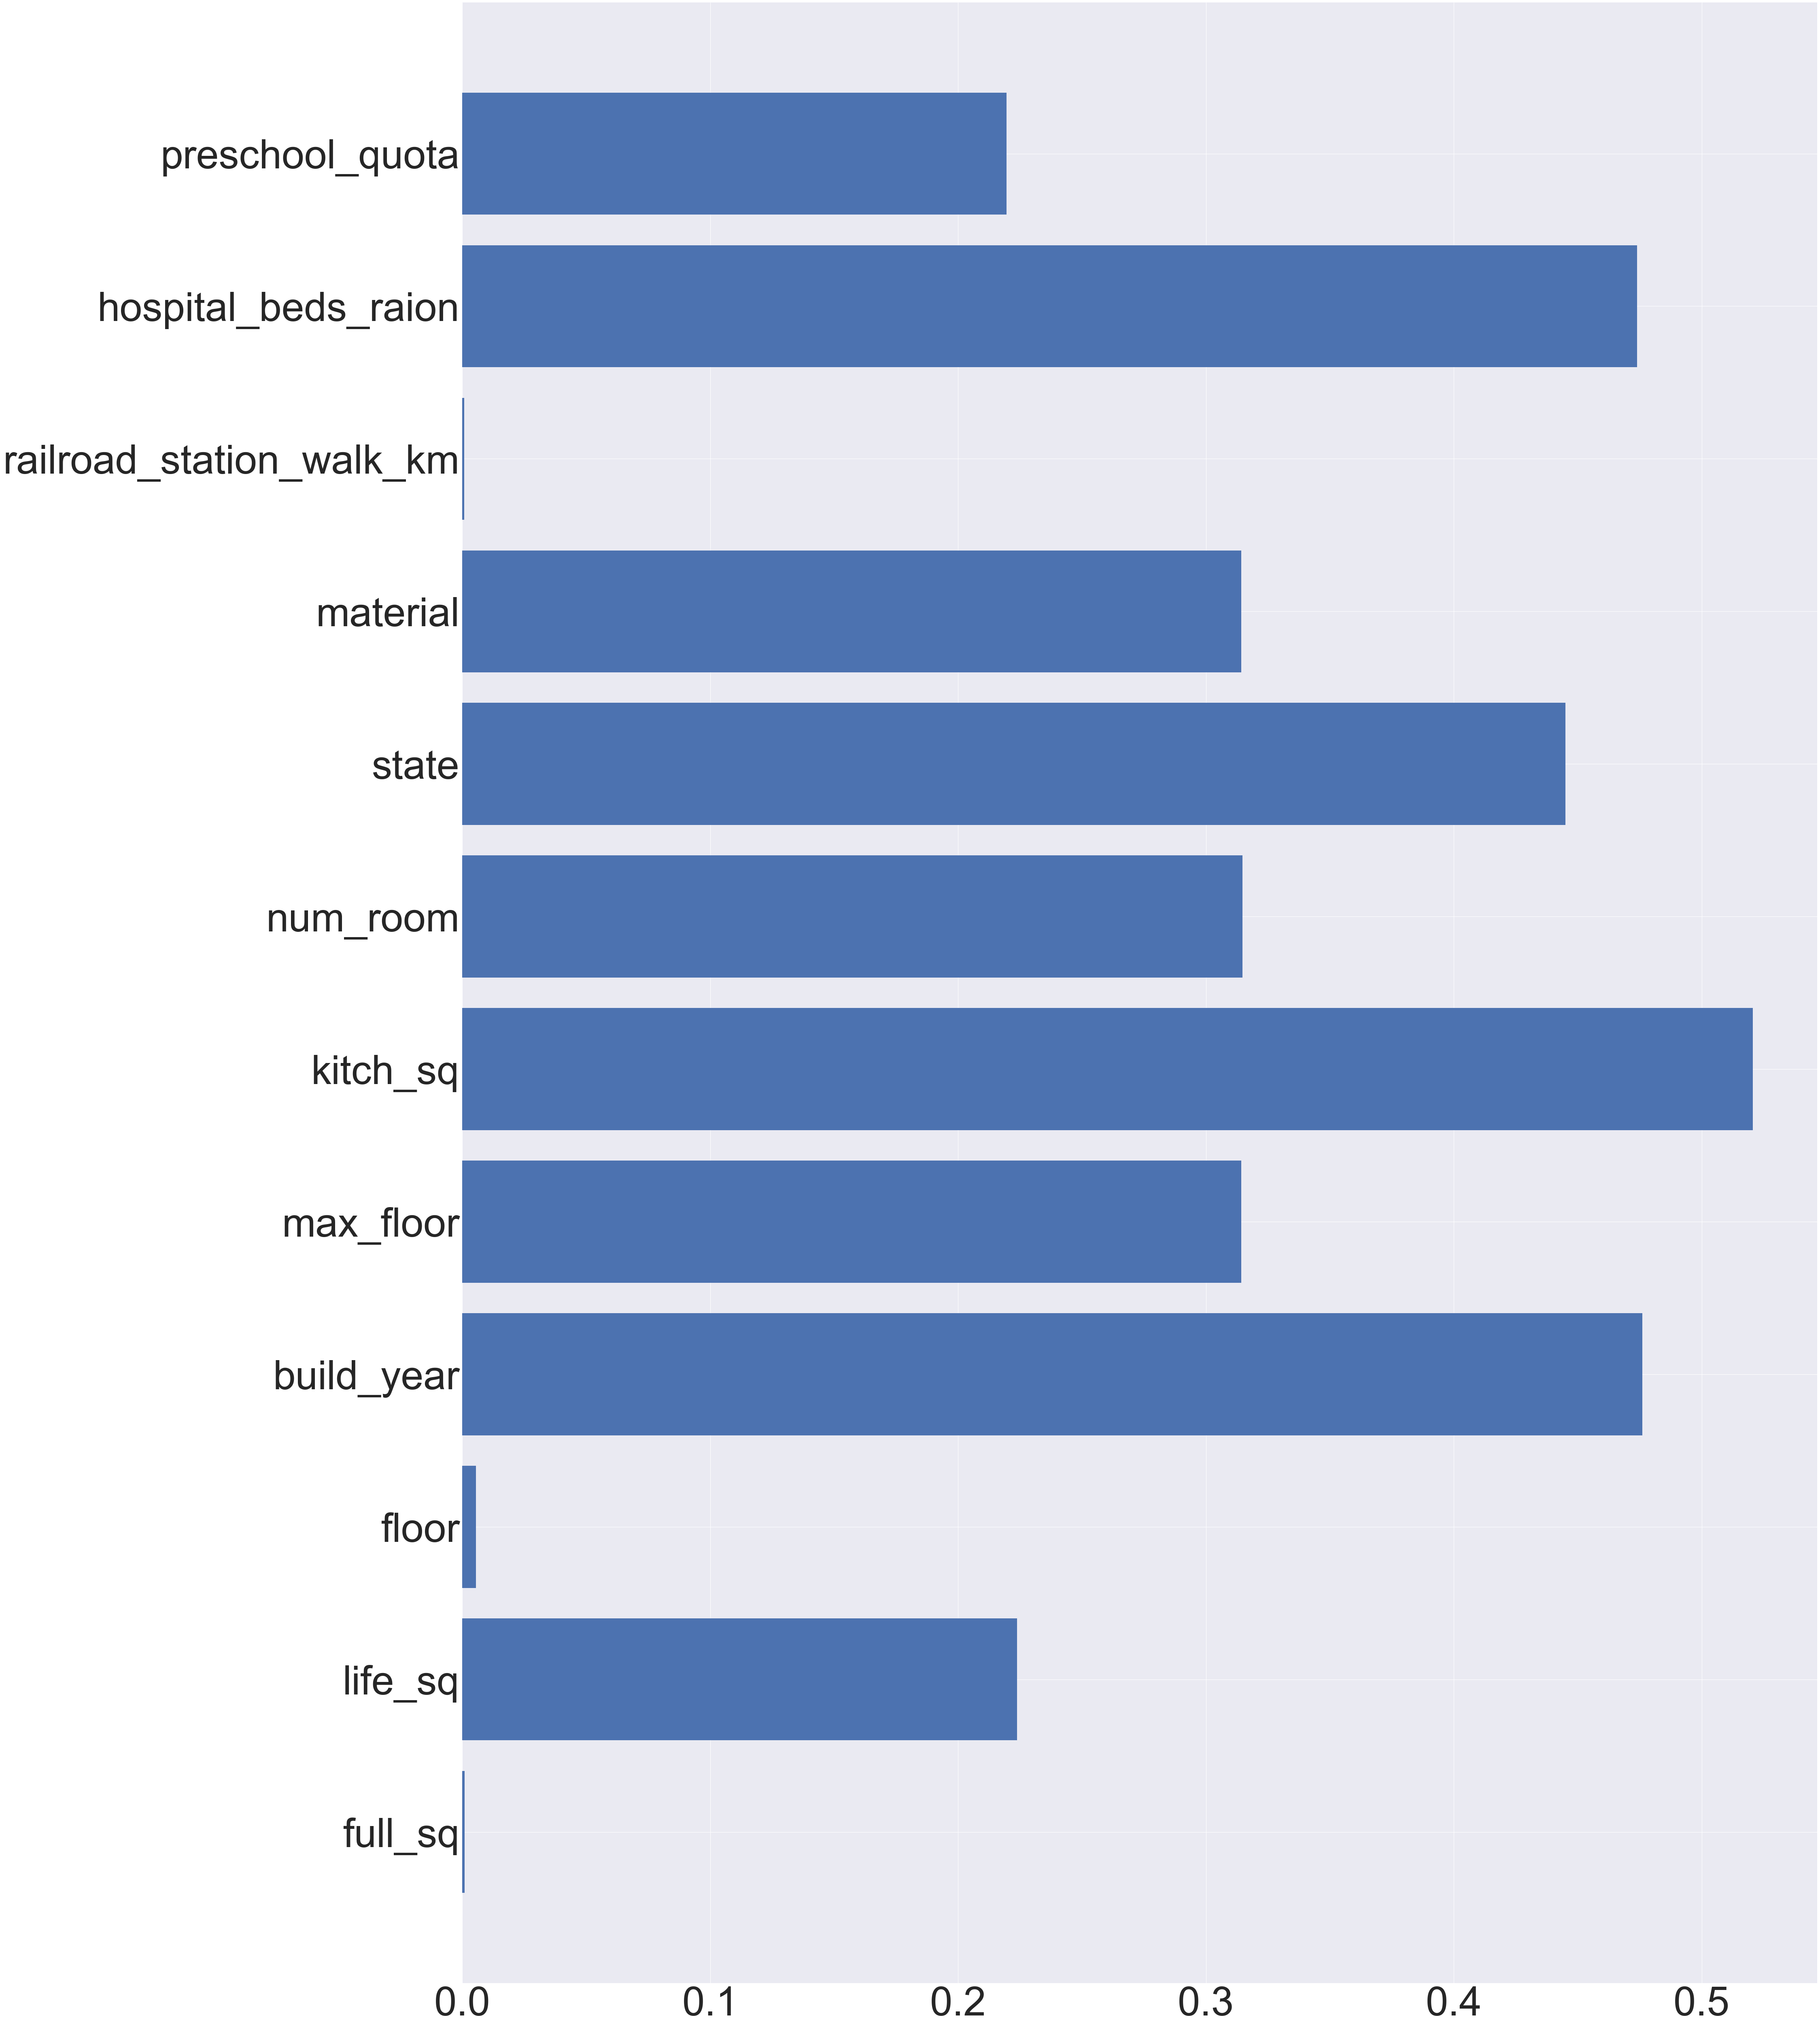

In [26]:
# train_data_features missing value plot

nan_counts = train_data_features.isnull().sum()
nan_ratios = nan_counts / train_data_features.shape[0]
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [27]:
print "Display sample of train_data_features :"
display(train_data_features.head())

Display sample of train_data_features :


full_sq  life_sq  floor  build_year  max_floor  month_year_cnt  \
0     43.0     27.0    4.0         NaN        NaN               3   
1     34.0     19.0    3.0         NaN        NaN               3   
2     43.0     29.0    2.0         NaN        NaN               3   
3     89.0     50.0    9.0         NaN        NaN              39   
4     77.0     77.0    4.0         NaN        NaN              39   

   week_year_cnt  kitch_sq  num_room  state  kindergarten_km  radiation_km  \
0              1       NaN       NaN    NaN         0.145700      1.210027   
1              2       NaN       NaN    NaN         0.147754      2.724295   
2              2       NaN       NaN    NaN         0.049102      0.772216   
3              1       NaN       NaN    NaN         0.179441      6.348716   
4              5       NaN       NaN    NaN         0.247901      1.638318   

   school_km  material  metro_min_avto  railroad_km  industrial_km  \
0   0.177975       NaN        2.590241     1.305159       1.080934   
1   0.273345       NaN        0.936700     0.694536       0.966479   
2   0.158072       NaN        2.120999     0.700691       0.939275   
3   0.236455       NaN        1.489049     1.999265       0.451173   
4   0.376838       NaN        1.257186     0.084113       0.392871   

   green_zone_km  theater_km  swim_pool_km  big_church_km  water_km  \
0       0.600973   14.053047      3.065047       0.625783  0.992631   
1       0.065321    6.829889      2.000154       0.967821  0.698081   
2       0.453172    4.273200      1.239304       3.178751  0.468265   
3       0.106125   16.990677      1.950317       1.031777  1.200336   
4       0.236214    1.112486      2.544696       0.378756  0.820294   

   railroad_station_walk_km  hospice_morgue_km  mosque_km  cemetery_km  \
0                  5.419893           2.392353   3.932040     1.804127   
1                  3.411993           2.543747   4.841544     4.655004   
2                  1.277658           0.621357   7.922152     3.381083   
3                  4.291432           3.549558  15.300449     2.017080   
4                  0.853960           1.864637   2.584370     2.936581   

   fitness_km  nuclear_reactor_km  church_synagogue_km   park_km  \
0    0.485841            5.718519             0.628187  2.158587   
1    0.668364            3.489954             0.471447  0.550690   
2    0.733101            7.506612             0.755946  0.374848   
3    0.623484            9.522538             1.561505  0.078090   
4    0.220288            8.671016             0.121681  0.258289   

   green_part_500  hospital_beds_raion  market_shop_km  \
0            0.00                240.0        1.676258   
1           25.14                229.0        3.424716   
2            1.67               1183.0        1.375443   
3           17.36                  NaN        0.811275   
4            3.56                562.0        1.969738   

   thermal_power_plant_km  sadovoe_km  ice_rink_km  water_treatment_km  \
0                5.814135   13.100618     1.107594           23.683460   
1                3.419574    6.444333     8.972823            1.317476   
2                3.682455    6.963403     1.978517            4.912660   
3               11.178333   17.457198     6.483172           15.623710   
4                4.587917    0.046810     3.975401           10.683540   

   office_sqm_500  green_part_1500  preschool_quota   price_doc  
0               0            14.27           5001.0   5850000.0  
1               0            21.53           3119.0   6000000.0  
2               0             9.92           1463.0   5700000.0  
3               0            28.38           6839.0  13100000.0  
4          293699             4.12           3240.0  16331452.0

In [30]:
#impute nans with median 
non_missing = train_data_features.fillna(train_data_features.median())

In [31]:
print "Display sample of non_missing data:"
display(non_missing.head())

Display sample of non_missing data:


full_sq  life_sq  floor  build_year  max_floor  month_year_cnt  \
0     43.0     27.0    4.0      1981.0       12.0               3   
1     34.0     19.0    3.0      1981.0       12.0               3   
2     43.0     29.0    2.0      1981.0       12.0               3   
3     89.0     50.0    9.0      1981.0       12.0              39   
4     77.0     77.0    4.0      1981.0       12.0              39   

   week_year_cnt  kitch_sq  num_room  state  kindergarten_km  radiation_km  \
0              1       8.0       2.0    2.0         0.145700      1.210027   
1              2       8.0       2.0    2.0         0.147754      2.724295   
2              2       8.0       2.0    2.0         0.049102      0.772216   
3              1       8.0       2.0    2.0         0.179441      6.348716   
4              5       8.0       2.0    2.0         0.247901      1.638318   

   school_km  material  metro_min_avto  railroad_km  industrial_km  \
0   0.177975       1.0        2.590241     1.305159       1.080934   
1   0.273345       1.0        0.936700     0.694536       0.966479   
2   0.158072       1.0        2.120999     0.700691       0.939275   
3   0.236455       1.0        1.489049     1.999265       0.451173   
4   0.376838       1.0        1.257186     0.084113       0.392871   

   green_zone_km  theater_km  swim_pool_km  big_church_km  water_km  \
0       0.600973   14.053047      3.065047       0.625783  0.992631   
1       0.065321    6.829889      2.000154       0.967821  0.698081   
2       0.453172    4.273200      1.239304       3.178751  0.468265   
3       0.106125   16.990677      1.950317       1.031777  1.200336   
4       0.236214    1.112486      2.544696       0.378756  0.820294   

   railroad_station_walk_km  hospice_morgue_km  mosque_km  cemetery_km  \
0                  5.419893           2.392353   3.932040     1.804127   
1                  3.411993           2.543747   4.841544     4.655004   
2                  1.277658           0.621357   7.922152     3.381083   
3                  4.291432           3.549558  15.300449     2.017080   
4                  0.853960           1.864637   2.584370     2.936581   

   fitness_km  nuclear_reactor_km  church_synagogue_km   park_km  \
0    0.485841            5.718519             0.628187  2.158587   
1    0.668364            3.489954             0.471447  0.550690   
2    0.733101            7.506612             0.755946  0.374848   
3    0.623484            9.522538             1.561505  0.078090   
4    0.220288            8.671016             0.121681  0.258289   

   green_part_500  hospital_beds_raion  market_shop_km  \
0            0.00                240.0        1.676258   
1           25.14                229.0        3.424716   
2            1.67               1183.0        1.375443   
3           17.36                990.0        0.811275   
4            3.56                562.0        1.969738   

   thermal_power_plant_km  sadovoe_km  ice_rink_km  water_treatment_km  \
0                5.814135   13.100618     1.107594           23.683460   
1                3.419574    6.444333     8.972823            1.317476   
2                3.682455    6.963403     1.978517            4.912660   
3               11.178333   17.457198     6.483172           15.623710   
4                4.587917    0.046810     3.975401           10.683540   

   office_sqm_500  green_part_1500  preschool_quota   price_doc  
0               0            14.27           5001.0   5850000.0  
1               0            21.53           3119.0   6000000.0  
2               0             9.92           1463.0   5700000.0  
3               0            28.38           6839.0  13100000.0  
4          293699             4.12           3240.0  16331452.0

In [37]:
# forward selection function
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            res   = smf.ols(formula, data).fit()
            print res.summary()
            score = res.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [33]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj


price_doc ~ full_sq + build_year + max_floor + floor + life_sq + 1
0.394320773736


In [34]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj

price_doc ~ full_sq + kindergarten_km + state + kitch_sq + month_year_cnt + build_year + floor + life_sq + week_year_cnt + num_room + 1
0.446237727588


In [38]:
#forward selection testing

model = forward_selected(non_missing, 'price_doc')

print model.model.formula


print model.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sun, 21 May 2017   Prob (F-statistic):          1.95e-254
Time:                        18:41:27   Log-Likelihood:            -5.1106e+05
No. Observations:               30471   AIC:                         1.022e+06
Df Residuals:                   30469   BIC:                         1.022e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.814e+06   3.34e+04    233.

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     231.4
Date:                Sun, 21 May 2017   Prob (F-statistic):           4.55e-52
Time:                        18:41:27   Log-Likelihood:            -5.1153e+05
No. Observations:               30471   AIC:                         1.023e+06
Df Residuals:                   30469   BIC:                         1.023e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.194e+06   6.66e+04     92.994      0.0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     717.2
Date:                Sun, 21 May 2017   Prob (F-statistic):          3.59e-156
Time:                        18:41:27   Log-Likelihood:            -5.1129e+05
No. Observations:               30471   AIC:                         1.023e+06
Df Residuals:                   30469   BIC:                         1.023e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1506.
Date:                Sun, 21 May 2017   Prob (F-statistic):          1.54e-321
Time:                        18:41:27   Log-Likelihood:            -5.1091e+05
No. Observations:               30471   AIC:                         1.022e+06
Df Residuals:                   30469   BIC:                         1.022e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.514e+06   4.47e+04    190.607      0.0

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:            -5.0386e+05
No. Observations:               30471   AIC:                         1.008e+06
Df Residuals:                   30468   BIC:                         1.008e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.120e+04
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:            -5.0325e+05
No. Observations:               30471   AIC:                         1.006e+06
Df Residuals:                   30468   BIC:                         1.007e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.792e+05   5.67e+04     

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.284e+04
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:            -5.0233e+05
No. Observations:               30471   AIC:                         1.005e+06
Df Residuals:                   30468   BIC:                         1.005e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.067e+06   5.95e+04     17.919      0.0

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9859.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:            -5.0130e+05
No. Observations:               30471   AIC:                         1.003e+06
Df Residuals:                   30467   BIC:                         1.003e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.964e+06   6.23e+04     

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9862.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:28   Log-Likelihood:            -5.0130e+05
No. Observations:               30471   AIC:                         1.003e+06
Df Residuals:                   30467   BIC:                         1.003e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.943e+06   6.12e+0

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     9904.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:            -5.0127e+05
No. Observations:               30471   AIC:                         1.003e+06
Df Residuals:                   30467   BIC:                         1.003e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.977e+06   6.07e+04     32.

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7720.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:            -5.0098e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30466   BIC:                         1.002e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.599e+05   9.52

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7703.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:            -5.0099e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30466   BIC:                         1.002e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7714.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:            -5.0098e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30466   BIC:                         1.002e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     6281.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:29   Log-Likelihood:            -5.0085e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30465   BIC:                         1.002e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.183e+05    9.8e+04      8.

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     6313.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:30   Log-Likelihood:            -5.0081e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30465   BIC:                         1.002e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6297.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:30   Log-Likelihood:            -5.0083e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30465   BIC:                         1.002e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           9.08e+05   9.82e+0

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6297.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:30   Log-Likelihood:            -5.0083e+05
No. Observations:               30471   AIC:                         1.002e+06
Df Residuals:                   30465   BIC:                         1.002e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.905e+05   9.96e+04      9.942

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     5488.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:30   Log-Likelihood:            -5.0048e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30464   BIC:                         1.001e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.803e+05   1.14

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5371.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:31   Log-Likelihood:            -5.0065e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30464   BIC:                         1.001e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.359e+06   1.02

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5378.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:31   Log-Likelihood:            -5.0064e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30464   BIC:                         1.001e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.282e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5377.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:31   Log-Likelihood:            -5.0064e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30464   BIC:                         1.001e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.315e+06   1.01

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5401.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:31   Log-Likelihood:            -5.0060e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30464   BIC:                         1.001e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.335e+06   1.01

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4740.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:31   Log-Likelihood:            -5.0042e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30463   BIC:                         1.001e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.016e+05   1.14

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4726.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:32   Log-Likelihood:            -5.0044e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30463   BIC:                         1.001e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.531e+05   1.18

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4710.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:32   Log-Likelihood:            -5.0047e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30463   BIC:                         1.001e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.052e+05   1.14

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4708.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:32   Log-Likelihood:            -5.0047e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30463   BIC:                         1.001e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.327e+05   1.14

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4729.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:32   Log-Likelihood:            -5.0043e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30463   BIC:                         1.001e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.284e+05   1.14

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4204.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:            -5.0031e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30462   BIC:                         1.001e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4196.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:            -5.0032e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30462   BIC:                         1.001e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.448e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4178.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:            -5.0036e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30462   BIC:                         1.001e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.523e+05   1.19

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4178.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:            -5.0036e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30462   BIC:                         1.001e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4175.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:            -5.0036e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30462   BIC:                         1.001e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.273e+05    1.2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3742.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:            -5.0030e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.77e+05   1.19

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3744.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:            -5.0029e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.285e+05   1.21

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3749.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:            -5.0028e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.595e+05    1.2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3745.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:            -5.0029e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.117e+05    1.2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3743.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -5.0029e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.062e+05   1.24

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3747.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -5.0029e+05
No. Observations:               30471   AIC:                         1.001e+06
Df Residuals:                   30461   BIC:                         1.001e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.526e+05   1.19

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3435.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -5.0014e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30460   BIC:                         1.000e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.636e+05   1.21

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     3413.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -5.0019e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30460   BIC:                         1.000e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.702e+06   2.79

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     3414.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:35   Log-Likelihood:            -5.0019e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30460   BIC:                         1.000e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.428e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     3414.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:36   Log-Likelihood:            -5.0019e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30460   BIC:                         1.000e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.436e+05   1.29

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     3416.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:36   Log-Likelihood:            -5.0018e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30460   BIC:                         1.000e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.137e+05   1.21

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3123.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:36   Log-Likelihood:            -5.0014e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3123.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:36   Log-Likelihood:            -5.0014e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.343e+05   1.22

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     3143.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -5.0008e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.484e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3123.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -5.0014e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.587e+05   1.21

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3124.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -5.0013e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.06

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3128.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -5.0012e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.861e+05   1.21

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3124.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:            -5.0013e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30459   BIC:                         1.000e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2882.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:38   Log-Likelihood:            -5.0008e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30458   BIC:                         1.000e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.825e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2881.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:38   Log-Likelihood:            -5.0008e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30458   BIC:                         1.000e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.425e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2881.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:38   Log-Likelihood:            -5.0008e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30458   BIC:                         1.000e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.433e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2882.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:38   Log-Likelihood:            -5.0008e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30458   BIC:                         1.000e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -9.7

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2889.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:39   Log-Likelihood:            -5.0006e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30458   BIC:                         1.000e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.225e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2678.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:39   Log-Likelihood:            -5.0003e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.383e+05   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2675.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:39   Log-Likelihood:            -5.0004e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2679.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:39   Log-Likelihood:            -5.0002e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.035e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2675.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:            -5.0004e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.443e+05   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2675.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:            -5.0004e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2677.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:            -5.0003e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30457   BIC:                         1.000e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -9.82e+05   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2509.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:            -4.9996e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2500.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:41   Log-Likelihood:            -4.9998e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.191e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2503.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:41   Log-Likelihood:            -4.9998e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.186e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2500.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:41   Log-Likelihood:            -4.9998e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.142e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2499.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:41   Log-Likelihood:            -4.9999e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.08

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2503.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:42   Log-Likelihood:            -4.9998e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.023e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2500.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:42   Log-Likelihood:            -4.9998e+05
No. Observations:               30471   AIC:                         1.000e+06
Df Residuals:                   30456   BIC:                         1.000e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.149e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2344.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:42   Log-Likelihood:            -4.9995e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.605e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2345.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:42   Log-Likelihood:            -4.9994e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.475e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2344.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:43   Log-Likelihood:            -4.9995e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.603e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2347.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:43   Log-Likelihood:            -4.9994e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.68e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2344.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:43   Log-Likelihood:            -4.9995e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.552e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2344.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:43   Log-Likelihood:            -4.9995e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30455   BIC:                         1.000e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.611e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:            -4.9992e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.381e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:            -4.9992e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.375e+06   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2208.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:            -4.9992e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.374e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:45   Log-Likelihood:            -4.9992e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.36

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2206.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:45   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.299e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     2205.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:45   Log-Likelihood:            -4.9992e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30454   BIC:                         1.000e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.414e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2078.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:45   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.449e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2078.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:46   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.463e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2078.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:46   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.461e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2078.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:46   Log-Likelihood:            -4.9991e+05
No. Observations:               30471   AIC:                         9.999e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.45

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2080.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:46   Log-Likelihood:            -4.9990e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.387e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2079.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:47   Log-Likelihood:            -4.9990e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30453   BIC:                         1.000e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.499e+06   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1965.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:47   Log-Likelihood:            -4.9990e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1966.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:47   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.452e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1965.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:47   Log-Likelihood:            -4.9990e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.567e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1967.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:48   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.643e+06   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1965.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:48   Log-Likelihood:            -4.9990e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1966.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:48   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30452   BIC:                         1.000e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.607e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:49   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.597e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1865.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:49   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.591e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:49   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.773e+06   2

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1866.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:49   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:50   Log-Likelihood:            -4.9989e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1865.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:50   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.524e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:50   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30451   BIC:                         1.000e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.615e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1773.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:50   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.659e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:50   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.652e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1773.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:51   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.385e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1775.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:51   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.728e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1773.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:51   Log-Likelihood:            -4.9988e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:51   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.584e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1773.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:52   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30450   BIC:                         1.000e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.676e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1690.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:52   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.728e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1691.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:52   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.721e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1690.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:52   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.262e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1691.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:53   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.814e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1691.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:53   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.656e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1691.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:53   Log-Likelihood:            -4.9987e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30449   BIC:                         1.000e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.747e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1614.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:54   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.656e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:54   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.561e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:55   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.669e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1614.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:55   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:55   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.627e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:55   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30448   BIC:                         1.000e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.677e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:56   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30447   BIC:                         1.000e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.585e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1545.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:56   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30447   BIC:                         1.000e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.487e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:56   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30447   BIC:                         1.000e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.61

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:57   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30447   BIC:                         1.000e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.476e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1545.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:57   Log-Likelihood:            -4.9986e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30447   BIC:                         1.000e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.632e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:57   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.456e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:58   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.524e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:58   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.475e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:58   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.46

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:58   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.421e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:59   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.998e+05
Df Residuals:                   30446   BIC:                         1.000e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.503e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:41:59   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.447e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:00   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.399e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:00   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.446e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:00   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.516e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:00   Log-Likelihood:            -4.9985e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:00   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30445   BIC:                         1.000e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.508e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:01   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.508e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:01   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.481e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:01   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.572e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -1.5e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.553e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30444   BIC:                         1.000e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.45e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.576e+06    

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:03   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:03   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:03   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.56

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:04   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.514e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:04   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30443   BIC:                         1.000e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.583e+06   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1273.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:04   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30442   BIC:                         1.000e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1272.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30442   BIC:                         1.000e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1272.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:            -4.9984e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30442   BIC:                         1.000e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.571e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1273.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30442   BIC:                         1.000e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1272.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30442   BIC:                         1.000e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.576e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:05   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30441   BIC:                         1.000e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.55e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:06   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30441   BIC:                         1.000e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.484e+06   1

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:06   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30441   BIC:                         1.000e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:06   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30441   BIC:                         1.000e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30441   BIC:                         1.000e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.569e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.49e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.993e+06   2

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.474e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.48

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:08   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.424e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1188.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:08   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30440   BIC:                         1.000e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.487e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:08   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30439   BIC:                         1.000e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.396e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:09   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30439   BIC:                         1.000e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.415e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:09   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30439   BIC:                         1.000e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.442e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:09   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30439   BIC:                         1.000e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1150.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:09   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30439   BIC:                         1.000e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.426e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:10   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30438   BIC:                         1.000e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.386e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:10   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30438   BIC:                         1.000e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.392e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:10   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30438   BIC:                         1.000e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.41

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:11   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30438   BIC:                         1.000e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.438e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:11   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30437   BIC:                         1.000e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.391e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:11   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30437   BIC:                         1.000e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.403e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:12   Log-Likelihood:            -4.9983e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30437   BIC:                         1.000e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.41

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:12   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30437   BIC:                         1.000e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.449e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:12   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30436   BIC:                         1.000e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.767e+06   3

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:12   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30436   BIC:                         1.000e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.443e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:13   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30436   BIC:                         1.000e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:13   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30436   BIC:                         1.000e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.413e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:13   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30435   BIC:                         1.000e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.431e+06   1

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:13   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30435   BIC:                         1.000e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:14   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30435   BIC:                         1.000e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.438e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     991.2
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:14   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30434   BIC:                         1.000e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.452e+06    

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     991.1
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:14   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30434   BIC:                         1.000e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     964.4
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:14   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30433   BIC:                         1.000e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.804e+06   3

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     964.4
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:15   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30433   BIC:                         1.000e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     939.1
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:15   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30432   BIC:                         1.000e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.92

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     939.0
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:42:15   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30432   BIC:                         1.000e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.44

In [36]:
print model.summary()

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     964.4
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        18:38:05   Log-Likelihood:            -4.9982e+05
No. Observations:               30471   AIC:                         9.997e+05
Df Residuals:                   30433   BIC:                         1.000e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.44

In [61]:
non_missing.to_csv('non_missing.csv')